In [1]:
!pip install pycaret --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scattertext 0.1.4 requires gensim>=4.0.0, but you have gensim 3.8.3 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.4.3 which is incompatible.
matrixprofile 1.1.10 requires protobuf==3.11.2, but you have protobuf 3.18.0 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import warnings
from pycaret.classification import *

warnings.filterwarnings('ignore')

In [3]:
artists_n_genres = pd.read_csv('../input/most-popular-genres-by-artist-spotify/artists_n_genres.csv')
artists_n_genres.head()

,Unnamed: 0,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,popular_genre
0,0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9,show tunes
1,8,"['comedy rock', 'comic', 'parody']","""Weird Al"" Yankovic",0.173145,0.662787,218948.196721,0.695393,0.000050,0.161102,-9.768705,0.084536,133.031180,0.751344,34.229508,9,1,122,comic
2,9,"['emo rap', 'florida rap', 'sad rap', 'undergr...",$NOT,0.544467,0.789800,137910.466667,0.532933,0.023063,0.180300,-9.149267,0.293687,112.344800,0.480700,67.533333,1,1,15,underground hip hop
3,10,"['dark trap', 'meme rap']",$atori Zoom,0.239000,0.883000,141519.000000,0.625000,0.000000,0.076500,-4.098000,0.245000,126.677000,0.871000,67.000000,6,1,2,dark trap
4,12,"['asian american hip hop', 'cali rap', 'west c...",$tupid Young,0.148100,0.854000,190572.000000,0.683000,0.000002,0.188500,-6.997000,0.221000,100.724500,0.625500,57.500000,1,1,2,cali rap


In [4]:
artists_n_genres.drop(['genres', 'Unnamed: 0'], axis=1, inplace=True)
artists_n_genres.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,popular_genre
0,"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9,show tunes
1,"""Weird Al"" Yankovic",0.173145,0.662787,218948.196721,0.695393,0.000050,0.161102,-9.768705,0.084536,133.031180,0.751344,34.229508,9,1,122,comic
2,$NOT,0.544467,0.789800,137910.466667,0.532933,0.023063,0.180300,-9.149267,0.293687,112.344800,0.480700,67.533333,1,1,15,underground hip hop
3,$atori Zoom,0.239000,0.883000,141519.000000,0.625000,0.000000,0.076500,-4.098000,0.245000,126.677000,0.871000,67.000000,6,1,2,dark trap
4,$tupid Young,0.148100,0.854000,190572.000000,0.683000,0.000002,0.188500,-6.997000,0.221000,100.724500,0.625500,57.500000,1,1,2,cali rap


In [5]:
artists_n_genres = artists_n_genres[artists_n_genres['popular_genre'].map(artists_n_genres['popular_genre'].value_counts()) > 60]

In [6]:
artists_n_genres['popular_genre_code'] = artists_n_genres['popular_genre'].astype('category').cat.codes
artists_n_genres.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,popular_genre,popular_genre_code
0,"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9,show tunes,54
1,"""Weird Al"" Yankovic",0.173145,0.662787,218948.196721,0.695393,0.000050,0.161102,-9.768705,0.084536,133.031180,0.751344,34.229508,9,1,122,comic,16
2,$NOT,0.544467,0.789800,137910.466667,0.532933,0.023063,0.180300,-9.149267,0.293687,112.344800,0.480700,67.533333,1,1,15,underground hip hop,61
5,$uicideBoy$,0.141485,0.749344,146386.392000,0.635552,0.045675,0.202253,-6.631304,0.156108,115.022024,0.287286,61.800000,1,1,125,underground hip hop,61
6,'In The Heights' Original Broadway Company,0.624769,0.563615,314023.615385,0.457692,0.000009,0.204385,-8.338462,0.152454,117.006846,0.467538,47.692308,7,1,13,show tunes,54


In [7]:
clf = setup(
    data=artists_n_genres, 
    target='popular_genre_code', 
    ignore_features=['popular_genre', 'artists'],
    silent=True, 
    log_experiment=True,
    session_id=1, 
    fix_imbalance=True, 
    experiment_name='pycaret',
)

,Description,Value
0,session_id,1
1,Target,popular_genre_code
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(9375, 17)"
5,Missing Values,False
6,Numeric Features,12
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
best_model = compare_models(sort='AUC', fold=3, exclude=['gbc'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.3734,0.9115,0.3427,0.3674,0.3662,0.3589,0.3590,328.8567
rf,Random Forest Classifier,0.3638,0.8943,0.3645,0.3751,0.3574,0.3511,0.3516,4.1433
xgboost,Extreme Gradient Boosting,0.3363,0.8857,0.3153,0.3401,0.3342,0.3213,0.3214,1353.9733
et,Extra Trees Classifier,0.3409,0.8825,0.3266,0.3365,0.3315,0.3267,0.3270,1.7900
lightgbm,Light Gradient Boosting Machine,0.3476,0.8754,0.3138,0.3469,0.3421,0.3317,0.3319,16.3233
lda,Linear Discriminant Analysis,0.2418,0.8726,0.2747,0.2871,0.2359,0.2295,0.2305,0.1300
nb,Naive Bayes,0.1096,0.7940,0.1514,0.1868,0.0929,0.0993,0.1017,0.1267
lr,Logistic Regression,0.0730,0.7241,0.0961,0.0922,0.0557,0.0611,0.0621,24.1233
dt,Decision Tree Classifier,0.2237,0.6043,0.2219,0.2390,0.2270,0.2082,0.2084,0.3933
ada,Ada Boost Classifier,0.0401,0.5551,0.0560,0.0133,0.0165,0.0291,0.0454,2.1633


In [9]:
tuned_model = tune_model(best_model, optimize='AUC', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.3665,0.9115,0.3522,0.3711,0.3622,0.3532,0.3535
1,0.3475,0.9069,0.3298,0.3609,0.3485,0.3339,0.3341
2,0.3644,0.9150,0.3620,0.3776,0.3624,0.3515,0.3519
Mean,0.3595,0.9111,0.3480,0.3699,0.3577,0.3462,0.3465
SD,0.0085,0.0033,0.0135,0.0069,0.0065,0.0087,0.0088


In [10]:
print(tuned_model)

In [11]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

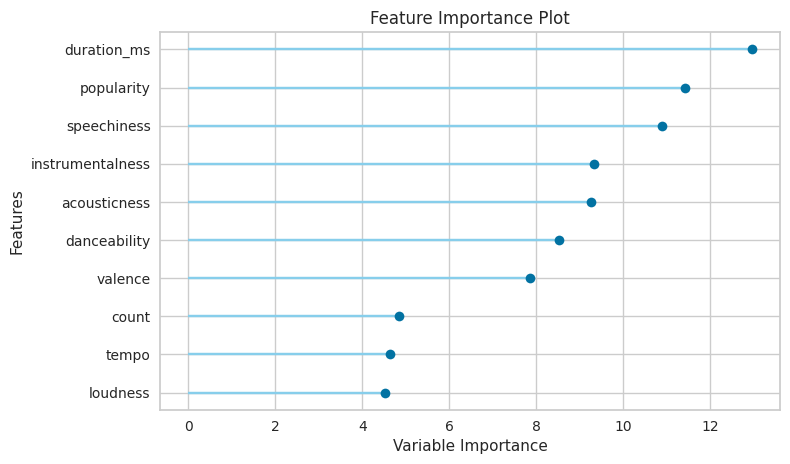

In [12]:
plot_model(tuned_model, plot='feature')

2021-10-15 20:57:48.500933: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-15 20:57:48.501756: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/pycaret/internal/pipeline.py", line 118, in fit
    result = super().fit(X, y=y, **fit_kwargs)
  File "/opt/conda/lib/

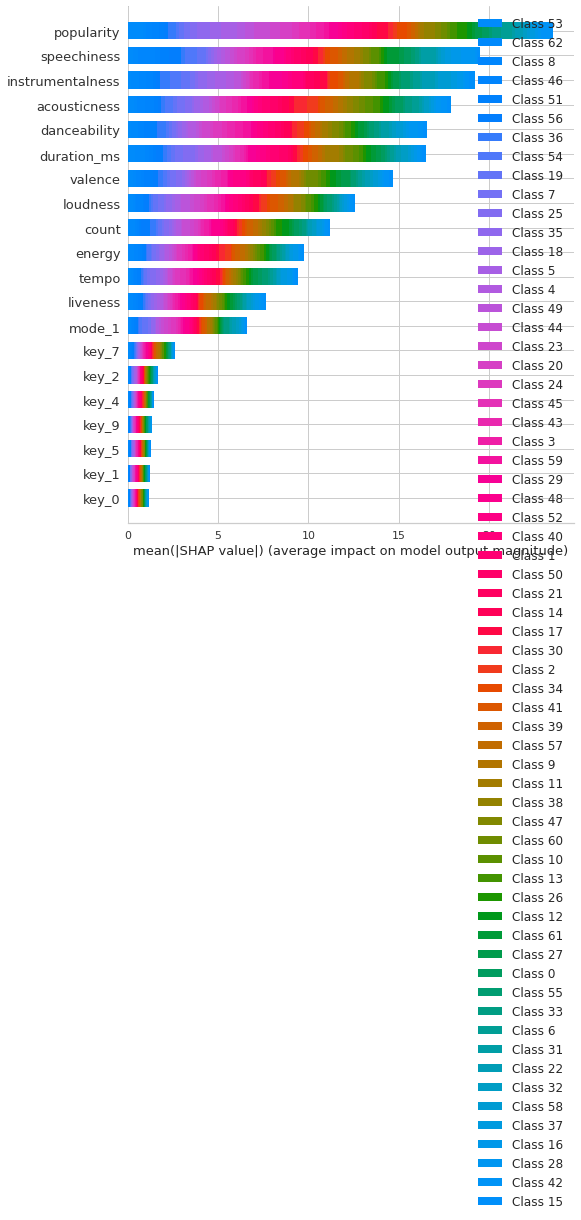

In [13]:
interpret_model(tuned_model, plot='summary')

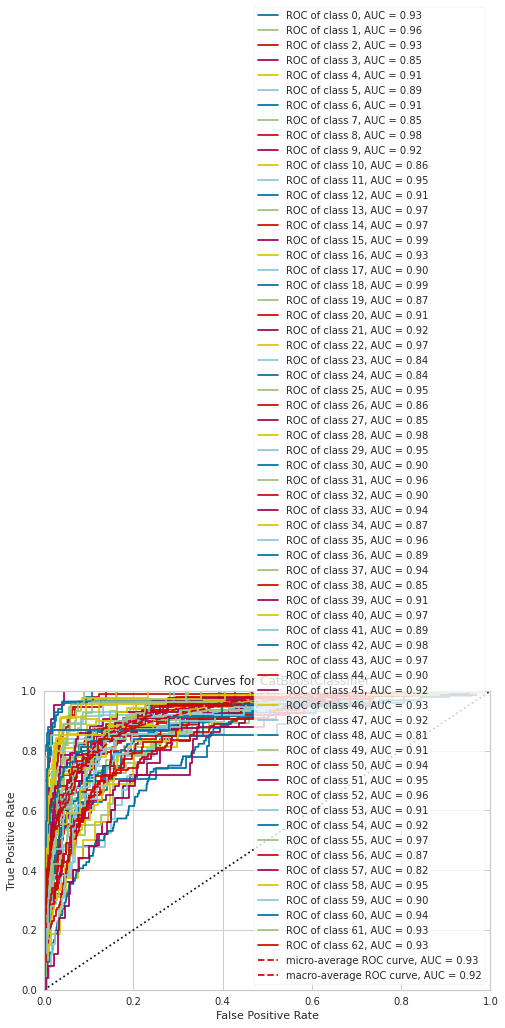

In [14]:
plot_model(tuned_model, plot='auc')